<a href="https://colab.research.google.com/github/RM-RAMASAMY/CRISP_DM_SEMMA_AND_KDD-/blob/main/KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Knowledge Discovery in Databases (KDD)

**Knowledge Discovery in Databases (KDD)** is a process of discovering useful, valid, and meaningful patterns and knowledge from large volumes of data. It's a multidisciplinary field that combines techniques from machine learning, statistics, artificial intelligence, and database management systems.

---

## Key Steps in the KDD Process

1. **Data Selection**:
   - Identifying the relevant data for the analysis.
   - Collecting and integrating data from various sources.

2. **Data Preprocessing**:
   - Cleaning the data to remove noise, handle missing values, and resolve inconsistencies.
   - Transforming data into a suitable format for analysis.

3. **Data Transformation**:
   - Reducing the data's dimensionality or extracting useful features.
   - Applying techniques like normalization, aggregation, or discretization.

4. **Data Mining**:
   - Using algorithms to identify patterns, correlations, or trends in the data.
   - Techniques include classification, clustering, regression, association rule mining, and anomaly detection.

5. **Pattern Evaluation**:
   - Interpreting and validating the discovered patterns.
   - Ensuring the patterns are meaningful, useful, and not coincidental.

6. **Knowledge Presentation**:
   - Visualizing or summarizing the extracted knowledge.
   - Delivering the results in a user-friendly format.

---

## Applications of KDD

- **Business**: Market segmentation, customer profiling, and fraud detection.
- **Healthcare**: Disease prediction and patient outcome analysis.
- **Finance**: Credit risk assessment and stock market prediction.
- **Telecommunications**: Network optimization and customer churn prediction.
- **Science**: Genomic research, environmental modeling, and astrophysics.


In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


# About Dataset

## Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.  
This dataset presents transactions that occurred in two days, where we have **492 frauds** out of **284,807 transactions**.  
The dataset is highly unbalanced: the positive class (frauds) accounts for **0.172% of all transactions**.

- It contains only **numerical input variables**, which are the result of a PCA transformation.  
- Unfortunately, due to confidentiality issues, the original features and more background information about the data cannot be provided.  
- Features **V1, V2, … V28** are the principal components obtained with PCA.  
- The only features not transformed with PCA are:
  - **Time**: Contains the seconds elapsed between each transaction and the first transaction in the dataset.
  - **Amount**: Represents the transaction amount, which can be used for cost-sensitive learning.  
- **Class**: The response variable, where:
  - **1** indicates fraud.
  - **0** indicates non-fraud.

### Imbalance Consideration
Given the class imbalance ratio, it is recommended to measure the accuracy using the **Area Under the Precision-Recall Curve (AUPRC)**.  
Confusion matrix accuracy is not meaningful for unbalanced classification.


Dataset source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

---

<br>

## Step 1: Selection

**Dataset:**  
The "Credit Card Fraud Detection" dataset is selected due to its complexity, including high dimensionality, anonymized features, and severe class imbalance.

**Goal:**  
Identify fraudulent transactions (binary classification problem).

**Why:**  
Credit card fraud detection is a critical use case in finance.

In [32]:

url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
data = pd.read_csv(url)



# Explanation:
 - The dataset contains 31 columns, where:
   - Columns `V1` to `V28` are anonymized features from PCA transformation.
   - `Time`: Seconds elapsed between the first transaction and this one.
   - `Amount`: Transaction amount.
   - `Class`: Target variable (0 = Non-fraud, 1 = Fraud).

In [33]:
print("Dataset Sample:")
display(data.head())

# Check the shape of the dataset
print(f"\nDataset Shape: {data.shape}")



Dataset Sample:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Dataset Shape: (284807, 31)


## Step 2: Preprocessing

- **Missing Values:**  
  There are no missing values in this dataset.

- **Class Imbalance:**  
  The dataset is highly imbalanced, with fraudulent transactions making up a tiny fraction.

- **Scaling:**  
  Standardize `Time` and `Amount` to ensure features are comparable.

- **Split Features and Target:**  
  Separate predictors (`X`) and target variable (`y`).


Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class Distribution:


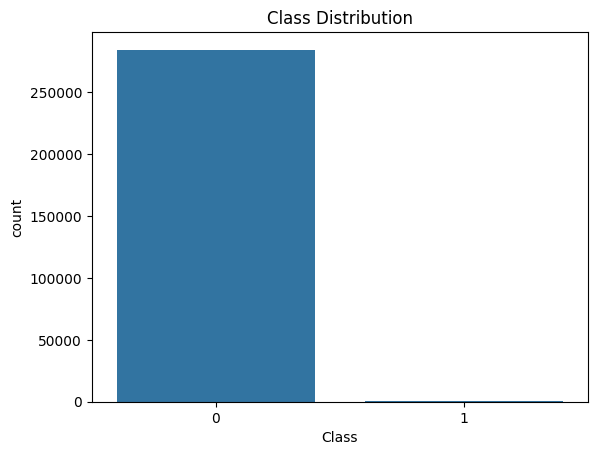

In [34]:

print("\nMissing Values:")
print(data.isnull().sum())

# 2.2 Check class imbalance
print("\nClass Distribution:")
sns.countplot(x='Class', data=data)
plt.title("Class Distribution")
plt.show()



# Explanation:
- Fraudulent transactions (Class = 1) are much rarer than non-fraudulent transactions.
- Class imbalance will be handled later using SMOTE.

In [35]:
# Standardize 'Amount' and 'Time' columns (important for algorithms sensitive to scaling)
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])
data['Time'] = scaler.fit_transform(data[['Time']])

# Split features and target
X = data.drop('Class', axis=1)
y = data['Class']

## Step 3: Transformation

- **SMOTE (Synthetic Minority Oversampling Technique):**  
  - Generates synthetic samples for the minority class to balance the dataset.  
  - Addresses class imbalance to improve model performance.

In [36]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Explanation:
 - After resampling, both classes will have an equal number of samples.

In [37]:
print(f"\nClass Distribution After SMOTE:\n{y_resampled.value_counts()}")


Class Distribution After SMOTE:
Class
0    284315
1    284315
Name: count, dtype: int64


## Step 4: Data Mining

- **Model:**  
  Random Forest Classifier, chosen for its robustness and interpretability.

- **Train-Test Split:**  
  Splitting data ensures the model is evaluated on unseen data.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Explanation:
 - 70% of the data is used for training, and 30% for testing.

In [39]:
# Apply a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

## Step 5: Evaluation

- **Classification Metrics:**  
  Use precision, recall, F1-score, and accuracy for evaluation.  
  Precision and recall are critical for imbalanced datasets.

- **Confusion Matrix:**  
  Visualize predictions to understand true positives, false positives, etc.

- **Feature Importance:**  
  Identify key features influencing fraud prediction.


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589


Confusion Matrix:


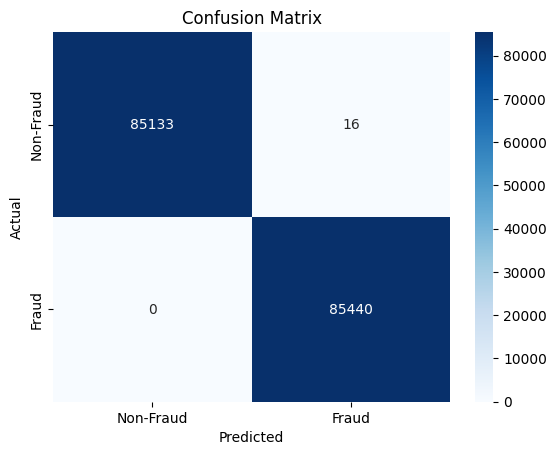


Accuracy: 0.9999062073170016


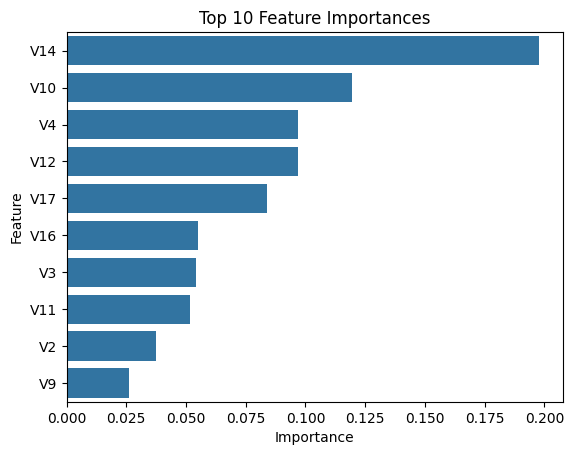

In [40]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

print("\nAccuracy:", accuracy_score(y_test, y_pred))

# Feature importance analysis
feature_importances = model.feature_importances_
feature_names = X.columns
important_features = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
important_features = important_features.sort_values(by='Importance', ascending=False).head(10)

sns.barplot(x='Importance', y='Feature', data=important_features)
plt.title("Top 10 Feature Importances")
plt.show()


In [41]:
# prompt: print the model summary in an interpretable form

print("\nModel Summary:")
print("-" * 20)
print("Model Type:", type(model).__name__)
print("Training Data Size:", X_train.shape[0])
print("Testing Data Size:", X_test.shape[0])
print("Number of Features:", X_train.shape[1])
print("Classes:", np.unique(y_train))
print("-" * 20)

# You can add more details like hyperparameters used if needed
print("Hyperparameters:")
for param, value in model.get_params().items():
  print(f"- {param}: {value}")
print("-" * 20)


Model Summary:
--------------------
Model Type: RandomForestClassifier
Training Data Size: 398041
Testing Data Size: 170589
Number of Features: 30
Classes: [0 1]
--------------------
Hyperparameters:
- bootstrap: True
- ccp_alpha: 0.0
- class_weight: None
- criterion: gini
- max_depth: None
- max_features: sqrt
- max_leaf_nodes: None
- max_samples: None
- min_impurity_decrease: 0.0
- min_samples_leaf: 1
- min_samples_split: 2
- min_weight_fraction_leaf: 0.0
- monotonic_cst: None
- n_estimators: 100
- n_jobs: None
- oob_score: False
- random_state: 42
- verbose: 0
- warm_start: False
--------------------
